In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [11]:
#filepaths for country data, names
filepathmat = 'datafiles/processed.txt'
filepathcont = 'datafiles/row.txt'
filepathdemvar = 'datafiles/column.txt'

#read in country names, then data with index as names
cont = pd.read_csv(filepathcont, header=None)
demvar = pd.read_csv(filepathdemvar, header=None)
df = pd.read_csv(filepathmat, header=None)
df = df.set_axis(cont[0], axis='index')

#Write to numpy array to do SVD
df_arr = df.to_numpy()
U, S, V = np.linalg.svd(df_arr)

In [12]:
testpts = []

j, k = 1, 2
for pts in range(U.shape[0]):
    testpts.append((S[j] *U[pts][j], S[k]*U[pts][k]))
pts = np.array(testpts)

Text(-5.945891649734862, 0.0278942868028376, 'Hong Kong     ')

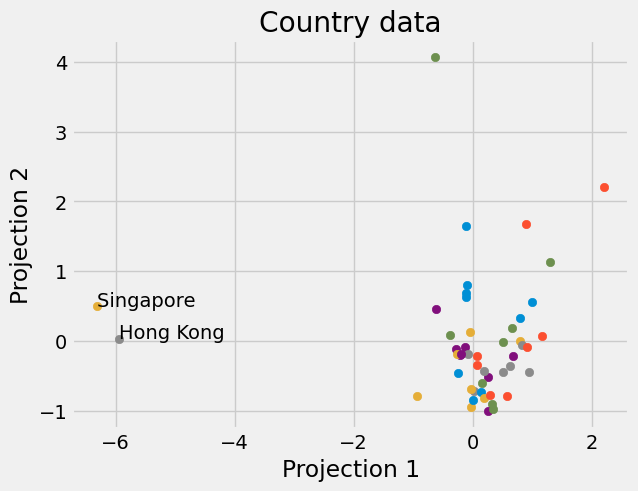

In [13]:
#Finding outliers
outlier1 = np.argmin(pts[:, 0])
outpt1 = (outlier1, pts[outlier1, :])
outlier2 = np.argmin(np.delete(pts[:, 0], outlier1))
outpt2 = (outlier2, pts[outlier2, :])

outliers = np.array([df.index[outlier1], df.index[outlier2]])

for x, y in pts:
    plt.scatter(x, y)
    
plt.title("Country data")
plt.style.use('fivethirtyeight')
plt.gray
plt.ylabel(f'Projection {k}')
plt.xlabel(f'Projection {j}')
#Labelling outliers on plot
plt.annotate(f'{outliers[0]}', xy=(outpt1[1]) )
plt.annotate(f'{outliers[1]}', xy=(outpt2[1]) )

Text(0.5, 0, 'Austria       ')

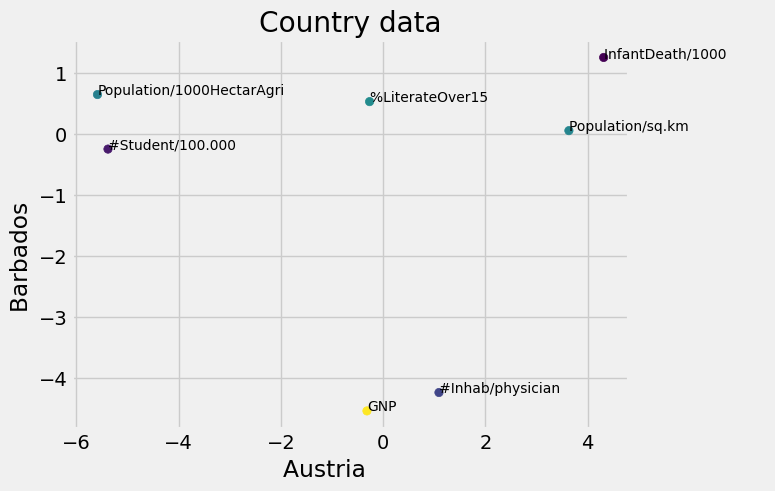

In [14]:
#Doing the same except for demographic variables
testpts = []

j, k = 1, 2
for pts in range(V.shape[0]):
    testpts.append((S[j] *V[pts][j], S[k]*V[pts][k]))
pts = np.array(testpts)


# Create the scatter plot
plt.scatter(pts[:, 0], pts[:, 1], c = [random.randint(0, x*10) for x in range(len(V))])

#Finding outliers
for i, (x, y) in enumerate(pts):
    plt.annotate(f'{demvar[0][i]}', xy=(x, y), fontsize=10)
    
plt.title("Country data")
plt.style.use('fivethirtyeight')
plt.gray
plt.ylabel(f'{df.index[k]}')
plt.xlabel(f'{df.index[j]}')

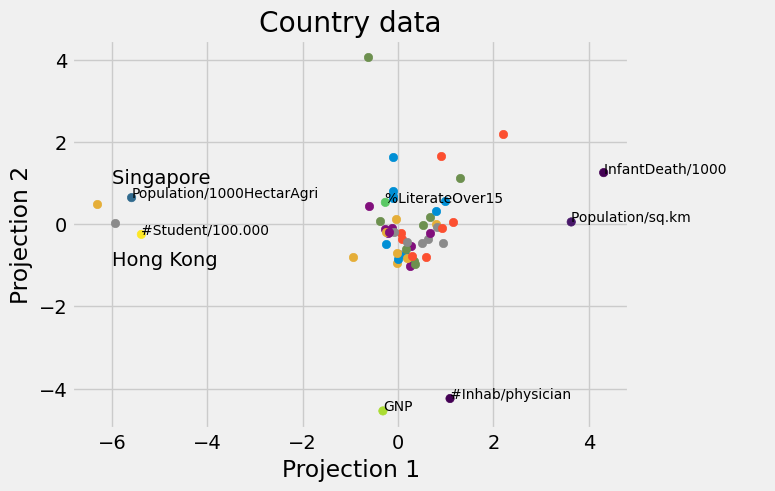

In [19]:
testpts = []

j, k = 1, 2
for pts in range(U.shape[0]):
    testpts.append((S[j] *U[pts][j], S[k]*U[pts][k]))
pts = np.array(testpts)

#Finding outliers
outlier1 = np.argmin(pts[:, 0])
outpt1 = (outlier1, pts[outlier1, :])
outlier2 = np.argmin(np.delete(pts[:, 0], outlier1))
outpt2 = (outlier2, pts[outlier2, :])

outliers = np.array([df.index[outlier1], df.index[outlier2]])

for x, y in pts:
    plt.scatter(x, y)
    
plt.title("Country data")
plt.style.use('fivethirtyeight')
plt.gray
plt.ylabel(f'Projection {k}')
plt.xlabel(f'Projection {j}')
#Labelling outliers on plot
plt.annotate(f'{outliers[0]}', xy=(outpt1[1]), xytext= (-6, 1) )
plt.annotate(f'{outliers[1]}', xy=(outpt2[1]), xytext=(-6, -1))


#Doing the same except for demographic variables
testpts = []

j, k = 1, 2
for pts in range(V.shape[0]):
    testpts.append((S[j] *V[pts][j], S[k]*V[pts][k]))
pts = np.array(testpts)


# Create the scatter plot
plt.scatter(pts[:, 0], pts[:, 1], c = [random.randint(0, x*10) for x in range(len(V))])

#Finding outliers
for i, (x, y) in enumerate(pts):
    plt.annotate(f'{demvar[0][i]}', xy=(x, y), fontsize=10)
    
plt.title("Country data")
plt.style.use('fivethirtyeight')
plt.gray


plt.show()

In [24]:
df = pd.read_csv(filepathmat, header=None)
df = df.set_axis(cont[0], axis='index')
df = df.drop(index = outliers)

#Write to numpy array to do SVD
df_arr = df.to_numpy()
U, S, V = np.linalg.svd(df_arr)

Text(0.5, 0, 'Projection 1')

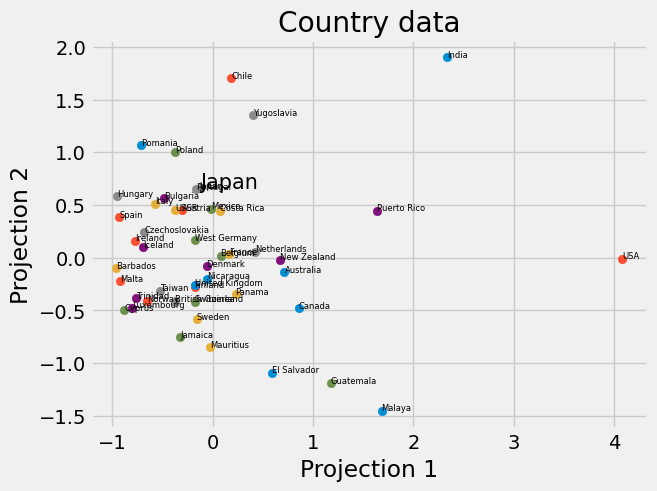

In [65]:
testpts = []

j, k = 1, 2
for pts in range(U.shape[0]):
    testpts.append((S[j] *U[pts][j], S[k]*U[pts][k]))
pts = np.array(testpts)



for i, (x, y) in enumerate(pts):
    if(i == 22):
        plt.annotate(df.index[i].strip(), xy = (x, y), fontsize = 15, xytext=(x, y))
    plt.annotate(df.index[i].strip(), xy=(x, y), fontsize = 6)
    plt.scatter(x, y)
plt.title("Country data")
plt.style.use('fivethirtyeight')
plt.gray
plt.ylabel(f'Projection {k}')
plt.xlabel(f'Projection {j}')


In [63]:
dist = np.array([np.linalg.norm((x - pts[22][0], y - pts[22][1])) for x, y in pts])
k = 5
indices = np.argpartition(dist, k)[:k]

# Get the 3 minimum values and their indices
min_values = dist[indices]

print("Closest countries to Japan:",  df.index[indices])

Closest countries to Japan: Index(['Portugal      ', 'Japan         ', 'Austria       ', 'Mexico        ',
       'Costa Rica    '],
      dtype='object', name=0)
